In [1]:
import numpy as np

In [2]:
## 데이터 생성
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [4]:
# 데이터 분리
train_data, test_data, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [5]:
print(train_data)
print('-----------------')
print(train_target)
print('-----------------')
print(test_data)
print('-----------------')
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
-----------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
-----------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
-----------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [6]:
# 2차원 데이터 생성
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [7]:
print(train_data)
print('-----------------')
print(test_data)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
-----------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [8]:
# 클래스(모델) 객체 생성
kn_r = KNeighborsRegressor(n_neighbors=3)
kn_r

KNeighborsRegressor(n_neighbors=3)

In [9]:
# 훈련데이터 학습 : 훈련모델 생성
kn_r.fit(train_data, train_target)

KNeighborsRegressor(n_neighbors=3)

In [10]:
# 예측데이터 : 50 / 100
print(kn_r.predict([[100]]))

[1033.33333333]


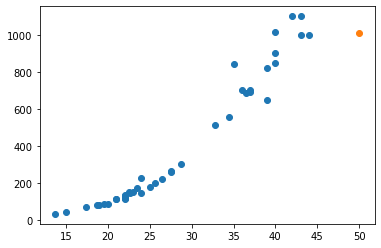

In [11]:
# 산점도 시각화
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
plt.scatter(50, 1010)

plt.show()

In [12]:
distances_r, indexes_r = kn_r.kneighbors([[50]])
print(distances_r)
print(indexes_r)

[[6. 7. 7.]]
[[34  8 14]]


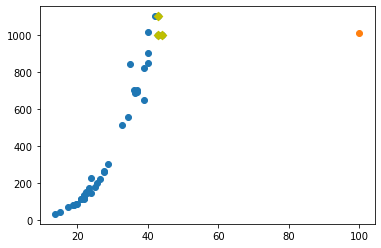

In [13]:
# 산점도 시각화
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
# plt.scatter(50, 1010)
plt.scatter(100, 1010)
plt.scatter(train_data[indexes_r], train_target[indexes_r], marker = 'D',c='y')

plt.show()

In [14]:
'''
KNN의 경우 훈련데이터 내의 범위 내에서만 예측이 가능하다는 단점을 가지고 있다.
범위를 벗어나면 예측이 불가능하다는 한계가 있다.

훈련데이터 범위 밖의 데이터를 예측하기 위해서는 선형회귀로 진행해야한다.
'''

'\nKNN의 경우 훈련데이터 내의 범위 내에서만 예측이 가능하다는 단점을 가지고 있다.\n범위를 벗어나면 예측이 불가능하다는 한계가 있다.\n\n훈련데이터 범위 밖의 데이터를 예측하기 위해서는 선형회귀로 진행해야한다.\n'

## 선형회귀(Linear Regression)
- 많이 사용되는 대표적인 회귀 알고리즘
- 비교적 간단하고, 성능이 뛰어나기 때문에 회귀모델 수행수 초반에 주로 진행
- 선형회귀 역할 : 하나의 특성을 가장 잘 나타내는 직선을 찾아내는 것이 주 역할
- 직선을 '추세선'이라고 합니다.
- 선형회귀 알고리즘 : 1차 방정식(y=ax+b)


- 선형회귀 클래스(모델) : LinearRegresin
- 사용되는 패키지 : sklearn.linear_model

In [16]:
## 선형회귀 클래스(모델) 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [17]:
## 사용데이터 : train_data, train_target, test_data, test_target
## 예측데이터 : 길이 50cm

# 학습 : 최적화된 기울기와 y절편을 찾기 위한 학습
lr.fit(train_data, train_target)
lr.predict([[50]])

array([1241.83860323])

In [18]:
## 일차방정식의 기울기와 y절편값 확인하기
# 일차방정식 : y=ax+b
# a : 기울기(coef_)
# b : y절편(intercept_)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


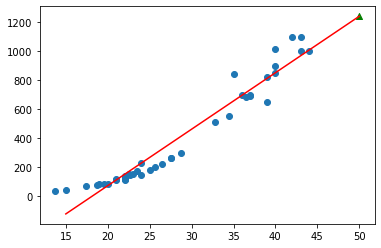

In [25]:
## 추세선을 이용하여 예측데이터 예측가능한지 확인
# - 예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인 (훈련데이터, 예측데이터)
plt.scatter(train_data,train_target)
plt.scatter(50, lr.predict([[50]]), marker = '^', c='g')

# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선
# plt.plpt(x축 범위, y축 범위)
plt.plot([15,50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_], c = 'r')

In [28]:
## 과적합여부 확인
# KNN은 과소적합이 나왔습니다, LR모델은 개선이 되었는지 확인
print(lr.score(test_data, test_target))    # 테스트데이터
print(lr.score(train_data, train_target))  # 훈련데이터

0.824750312331356
0.9398463339976041


In [ ]:
'''
(해석)
1. 과소적합은 해소되었으나 테스트 결과가 다소 낮게 나타났으나, 훈련데이터는 높은편이다.
다소 차이는 있으나 우수한 모델로 평가는 할 수 있다.
단, 훈련데이터와 테스트데이터의 결정계수 차이는 의심해봐야한다.

2. 그래프 왼쪽 하단의 산점도 분포가 조금 특이하다. 
약간의 곡선(round)을 띄고 있다.
또한, 추세선의 왼쪽 하단으로 직선을 연장했을 때 y축이 0 이하로 넘어간다.
무게는 0보다 작을 수 없기 때문에 음수를 예측하면 잘못된 모델이다.
(곡선을 띄면 직선(일차방정식) 사용 불가하므로 잘못된 모델 사용임,
다항회귀분석으로 넘어간다.)
'''

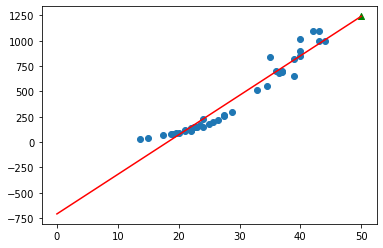

In [30]:
## 추세선을 이용하여 예측데이터 예측가능한지 확인
# - 예측데이터로 사용할 수 있을지 확인
# - 산점도를 이용해서 확인 (훈련데이터, 예측데이터)
plt.scatter(train_data,train_target)
plt.scatter(50, lr.predict([[50]]), marker = '^', c='g')

# 추세선 : 선형회귀 알고리즘(1차방정식)이 훈련데이터에서 찾은 최적의 직선
# plt.plpt(x축 범위, y축 범위)
plt.plot([0,50], [lr.coef_*0 + lr.intercept_, lr.coef_*50 + lr.intercept_], c = 'r')

## 다항회귀분석
- 다항식을 사용한 선형회귀를 '다항회귀'라고도 한다
- 다항식(이차방정식) : y=ax^2 + bx + c
- a와 b : 계수(기울기 포함)
- c : y절편

In [37]:
## 훈련데이터 train_data를 [[제곱된 값 1개, 원래값 1개], [], []]
# 변수 : train_poly
# column_stack() : 튜플형태로 넣어야함 (값, 값)
train_poly = np.column_stack((train_data**2, train_data))
train_poly.shape

(42, 2)

In [40]:
test_poly = np.column_stack((test_data**2, test_data))
test_poly.shape

(14, 2)

In [48]:
## 객체(모델) 생성
pr = LinearRegression()

## 훈련모델 생성
pr.fit(train_poly, train_target)

LinearRegression()

In [52]:
## 예측할 데이터 : 길이 50cm 의 무게
pr.predict([[50**2,50]])

array([1573.98423528])

In [67]:
## 계수 확인 (coef_, intercept_)
print(pr.coef_, pr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


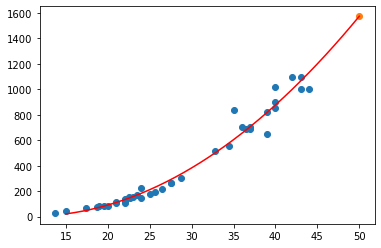

In [74]:
## 산점도 그리기 : 훈련데이터, 예측데이터, 추세선
plt.scatter(train_data, train_target)
plt.scatter(50,1573.98423528)

x = np.arange(15,51)    # 15~50
plt.plot(x, pr.coef_[0]*(x**2) + pr.coef_[1]*x + pr.intercept_, c = 'r')
# 1.01*(x**2) -21.56*x + 116.05

In [73]:
x

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

In [64]:
print(pr.score(train_poly, train_target))
print(pr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [ ]:
'''
(해석)
전체적으로 정확도는 낮아졌으나, 
훈련/테스트의 결정계수는 유사하게 가까워졌기때문에 우수한 모델이라고 할 수 있다.
다만, 아직 훈련이 테스트보다 낮은 과소적합을 보이고 있다.

그럼 어떻게 해야할까?
과소적합을 해소하기 위해 복잡도를 줄 수 있는 모델을 찾아야 한다.
선형회귀분석에서 복잡도를 주기 위해서는 항목을 추가하는 방법이 있다.
항목(특성)을 추가할수록 계산의 복잡도가 증가하기 때문이다.

그럼 특성을 추가하여 2개 이상의 독립변수가 존재하는 다중회귀분석을 사용해보자.

(참고)
과소적합 해소가 되지 않았다. 
현업에선 현실적으로 나올수 있는 수치로 보아 사용하지만 연구나 검증, 특허 등에선 사용할 수 있다.
'''